# Loading Data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [31]:
unemployment = pd.read_csv('Unemployment in India.csv')
unemployment_rate_upto_11_2020 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
unemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Exploritory Data Analysis (EDA)

In [32]:
unemployment.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [33]:
# Drop rows where ALL columns are NaN
unemployment = unemployment.dropna(how='all')

# Double check the result
unemployment.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [34]:
print(unemployment.columns.tolist())
unemployment.columns = unemployment.columns.str.strip()
print(unemployment.columns.tolist())

['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']
['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']


In [35]:
unemployment['Date'] = pd.to_datetime(unemployment['Date'], dayfirst=True)
unemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


# Visualizing National Trends

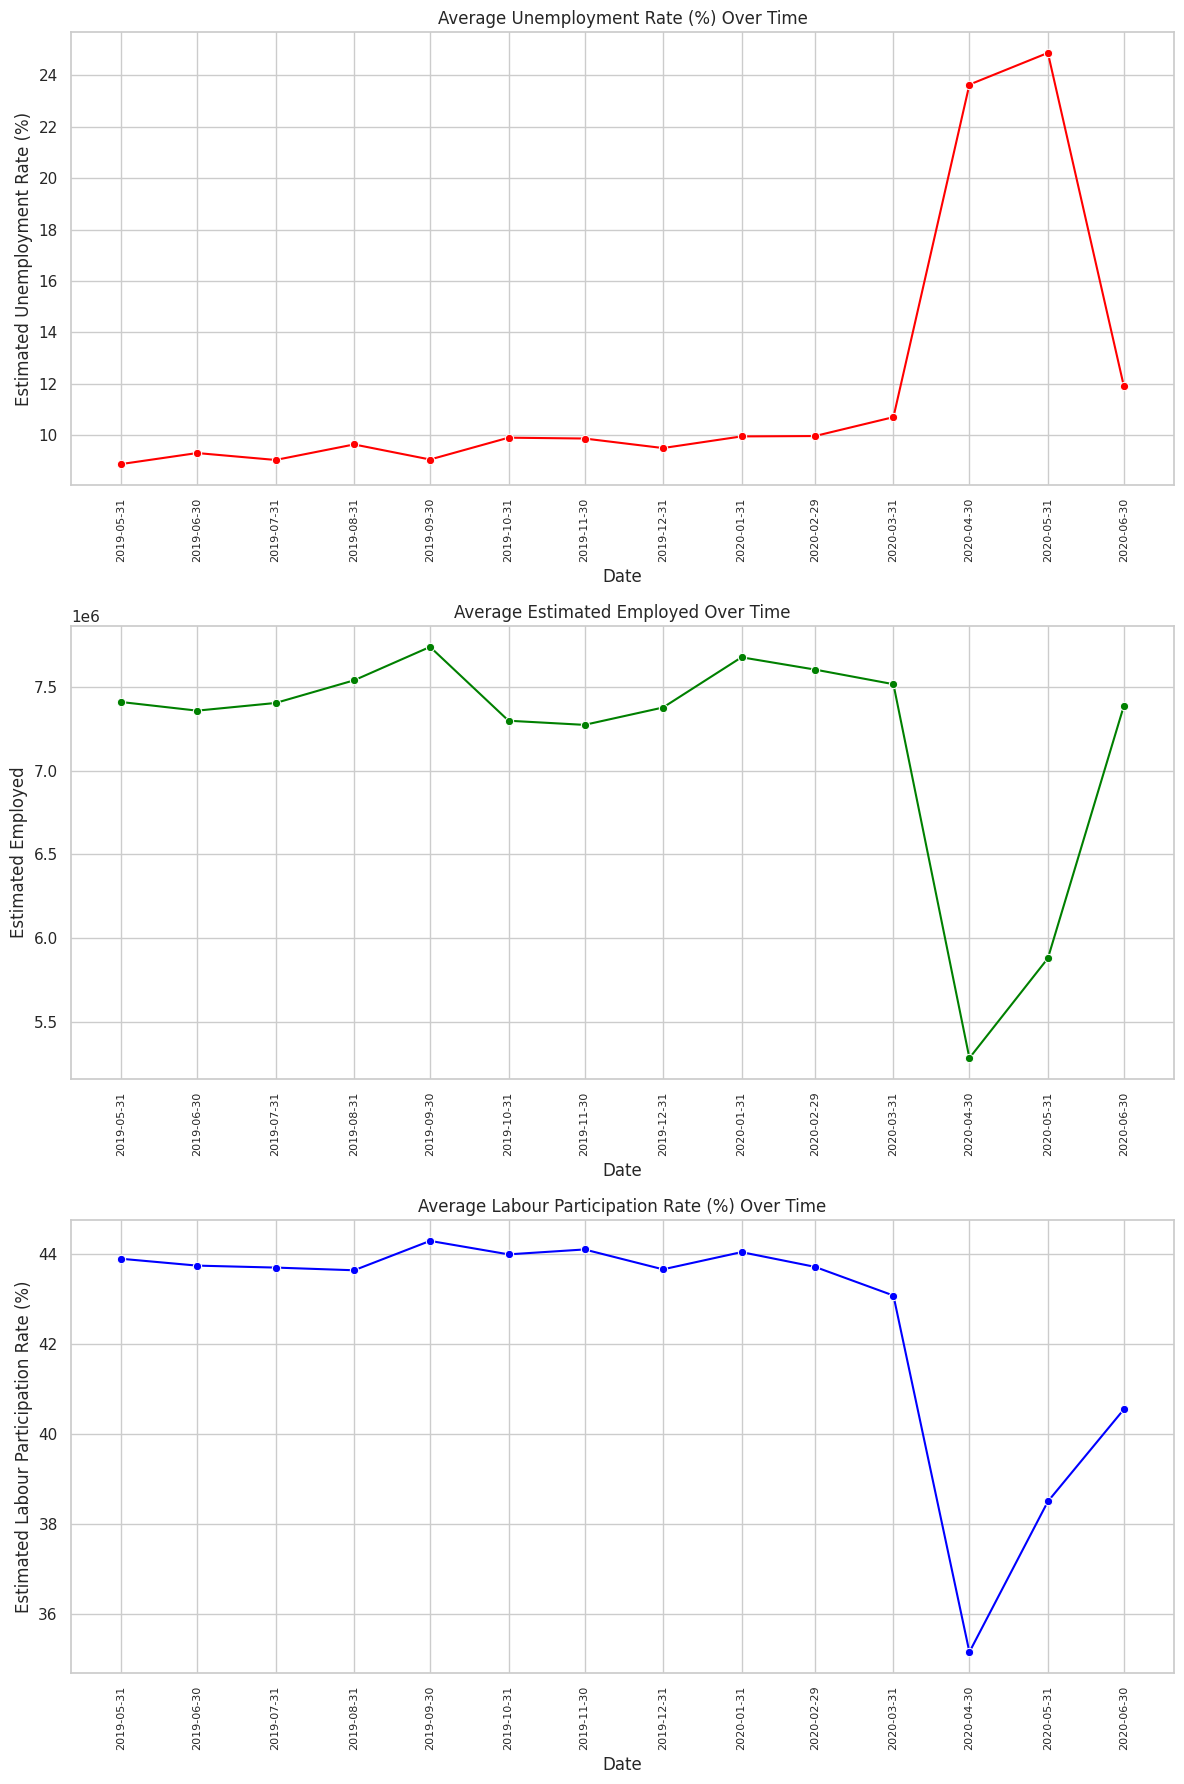

In [36]:
# Group by Date to get the mean across all regions
df_trend = unemployment.groupby('Date')[['Estimated Unemployment Rate (%)',
                                         'Estimated Employed',
                                         'Estimated Labour Participation Rate (%)']].mean().reset_index()

# Set up the figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. Unemployment Rate Trend
sns.lineplot(data=df_trend, x='Date', y='Estimated Unemployment Rate (%)', ax=axes[0], color='red', marker='o')
axes[0].set_title('Average Unemployment Rate (%) Over Time')
axes[0].grid(True)

# 2. Estimated Employed Trend
sns.lineplot(data=df_trend, x='Date', y='Estimated Employed', ax=axes[1], color='green', marker='o')
axes[1].set_title('Average Estimated Employed Over Time')
axes[1].grid(True)

# 3. Labour Participation Rate Trend
sns.lineplot(data=df_trend, x='Date', y='Estimated Labour Participation Rate (%)', ax=axes[2], color='blue', marker='o')
axes[2].set_title('Average Labour Participation Rate (%) Over Time')
axes[2].grid(True)

# Get the unique dates from your trend dataframe
date_labels = df_trend['Date'].dt.strftime('%Y-%m-%d').tolist()

# Apply the ticks to all 3 subplots (axes)
for ax in axes:
    ax.set_xticks(df_trend['Date'])
    ax.set_xticklabels(date_labels, rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

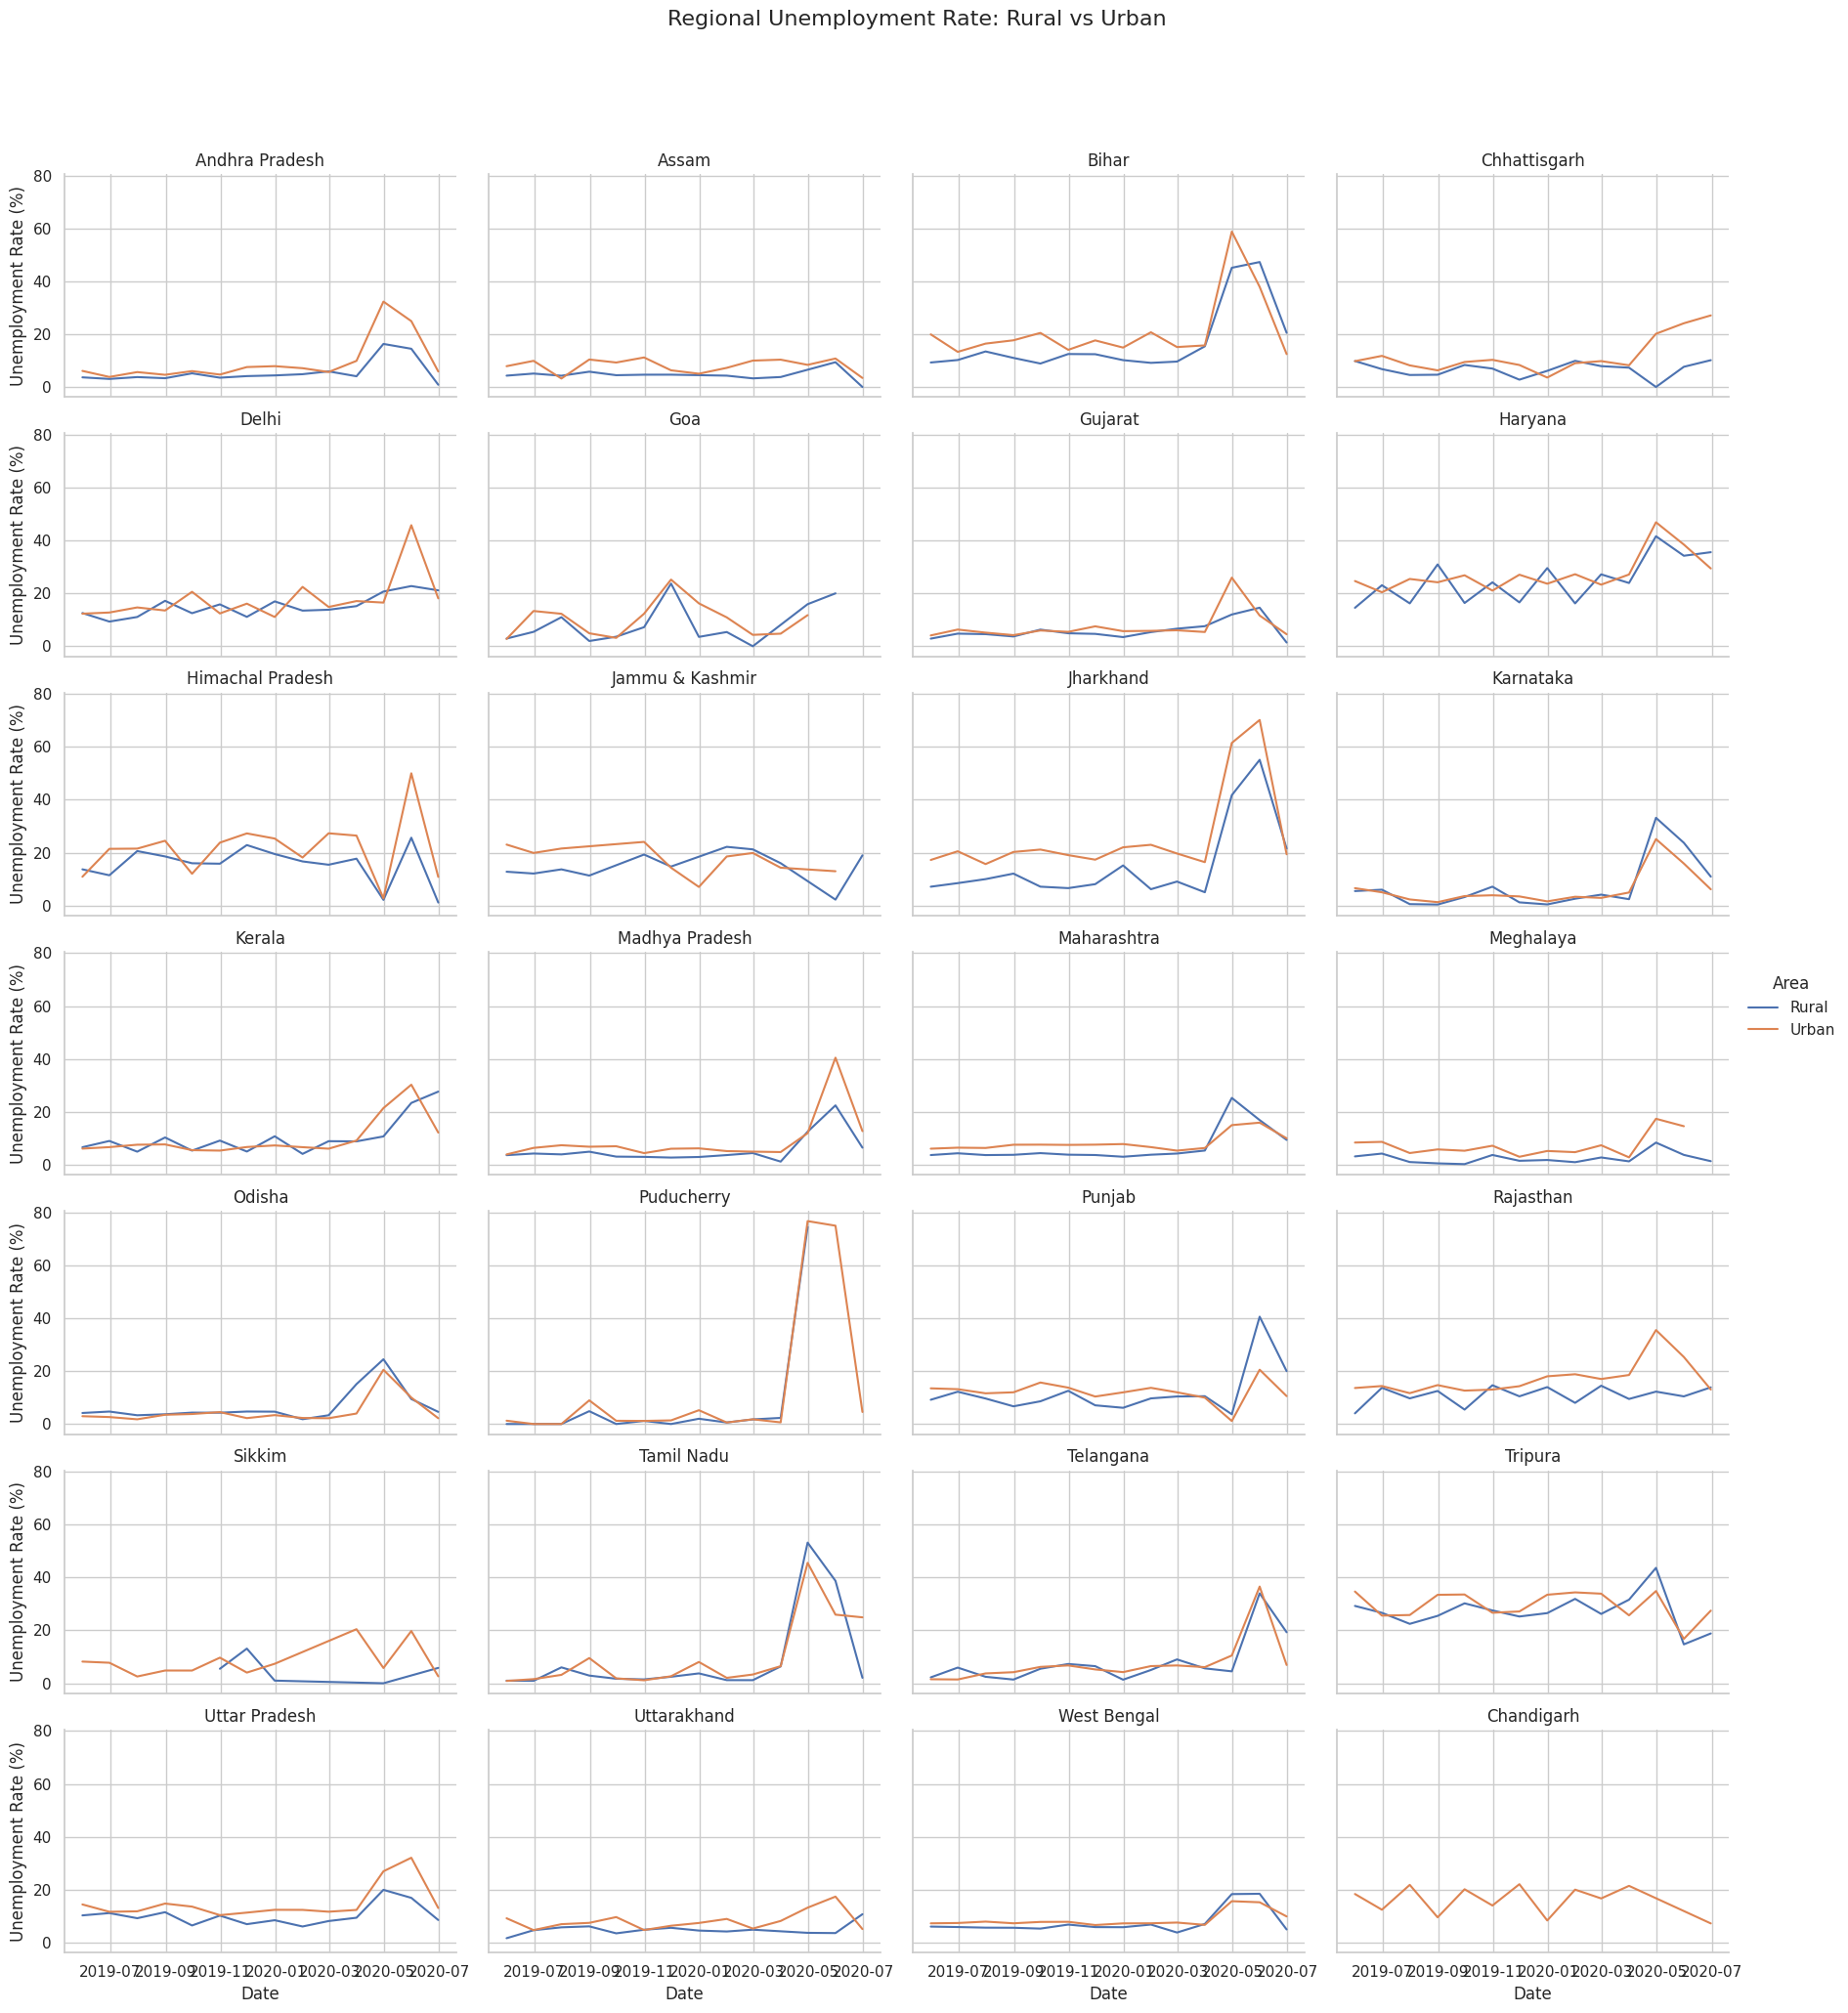

In [37]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Create a faceted line plot
# col_wrap=4 ensures we have 4 plots per row so it's readable
grid = sns.relplot(
    data=unemployment,
    x="Date",
    y="Estimated Unemployment Rate (%)",
    hue="Area",
    col="Region",
    kind="line",
    col_wrap=4,
    height=3,
    aspect=1.5
)

# Improve formatting
grid.set_axis_labels("Date", "Unemployment Rate (%)")
grid.set_titles("{col_name}") # Titles the subplots with the Region name
grid.fig.subplots_adjust(top=0.9)
grid.fig.suptitle('Regional Unemployment Rate: Rural vs Urban', fontsize=16)

plt.show()

# National Analysis

In [38]:
# Filter data for specific periods
pre_covid_data = df_trend[df_trend['Date'] < '2020-03-01']
covid_peak_data = df_trend[(df_trend['Date'] >= '2020-03-01') & (df_trend['Date'] <= '2020-12-31')]

# Calculate averages
avg_pre = pre_covid_data['Estimated Unemployment Rate (%)'].mean()
avg_peak = covid_peak_data['Estimated Unemployment Rate (%)'].mean()
pct_increase = ((avg_peak - avg_pre) / avg_pre) * 100

print(f"Average Unemployment before Covid: {avg_pre:.2f}%")
print(f"Average Unemployment during Peak Covid: {avg_peak:.2f}%")
print(f"Percentage Increase: {pct_increase:.2f}%")

Average Unemployment before Covid: 9.51%
Average Unemployment during Peak Covid: 17.78%
Percentage Increase: 87.00%


- The "Vertical" Spike: The unemployment rate  jumped significantly (87% increase) between 2020-03 and 2020-05 then started to stabilize at 2020-06. This highlights the effect the lockdown had on the Unemployment Rate.

- The Inverse Correlation: We notice that while the Unemployment Rate went up, the Estimated Employed count went down. This confirms that jobs were lost rather than people just entering the labor market for the first time.

- Labor Participation: The Labour Participation Rate also dropped. This means many people stopped looking for work entirely, likely due to lockdowns.

# Regional Analysis

In [39]:
# Filter for 2020 (the peak pandemic year)
unemployment_2020 = unemployment[unemployment['Date'].dt.year == 2020]

# Group by Region and find the peak unemployment rate
regional_stats = unemployment_2020.groupby('Region')['Estimated Unemployment Rate (%)'].max().sort_values(ascending=False).reset_index()

print("Peak Unemployment Rate by Region in 2020:")
print(regional_stats)

Peak Unemployment Rate by Region in 2020:
              Region  Estimated Unemployment Rate (%)
0         Puducherry                            76.74
1          Jharkhand                            70.17
2              Bihar                            58.77
3         Tamil Nadu                            53.19
4   Himachal Pradesh                            50.00
5            Haryana                            46.89
6              Delhi                            45.78
7            Tripura                            43.64
8             Punjab                            40.59
9     Madhya Pradesh                            40.49
10         Telangana                            36.57
11         Rajasthan                            35.53
12         Karnataka                            33.17
13    Andhra Pradesh                            32.30
14     Uttar Pradesh                            32.06
15            Kerala                            30.28
16      Chhattisgarh                    

In [40]:
# Bar chart of peak unemployment
fig_bar = px.bar(regional_stats, x='Region', y='Estimated Unemployment Rate (%)',
                 title="Peak Unemployment Rate reached in 2020 by Region",
                 color='Estimated Unemployment Rate (%)',
                 color_continuous_scale='Reds')

# Force all names to appear and rotate them
fig_bar.update_xaxes(type='category', dtick=1)
fig_bar.update_layout(xaxis_tickangle=-90)

fig_bar.show()

# Boxplot to see the distribution/volatility in each region
fig_box = px.box(unemployment_2020, x='Region', y='Estimated Unemployment Rate (%)',
                 color='Region', title="Distribution of Unemployment Rates by Region (2020)")
fig_box.update_layout(xaxis_tickangle=-90)
fig_box.show()

The analysis shows that while all regions experienced a spike, Puducherry had the biggest unemployment rate at the lockdown. Furthermore, the Boxplot indicates that Puducherry faced the most volatility, suggesting a struggle to stabilize the local economy during the recovery phase.

In [41]:
# 1. Define the periods
pre_lockdown = unemployment[unemployment['Date'] < '2020-03-01']
post_lockdown = unemployment[unemployment['Date'] >= '2020-03-01']

# 2. Calculate mean employment for both periods by Region
pre_mean = pre_lockdown.groupby('Region')['Estimated Employed'].mean().reset_index()
post_mean = post_lockdown.groupby('Region')['Estimated Employed'].mean().reset_index()

# 3. Merge the two into a single analysis dataframe
regional_analysis = pd.merge(pre_mean, post_mean, on='Region', suffixes=('_before', '_after'))

# 4. Rename columns for clarity
regional_analysis.columns = ['Region', 'Mean Jobs Before', 'Mean Jobs After']

# 5. Calculate Actual Job Loss and Job Loss Percentage
regional_analysis['Actual Job Loss'] = regional_analysis['Mean Jobs Before'] - regional_analysis['Mean Jobs After']
regional_analysis['Job Loss %'] = (regional_analysis['Actual Job Loss'] / regional_analysis['Mean Jobs Before']) * 100

# 6. Sort by the highest percentage loss to find hotspots
regional_analysis = regional_analysis.sort_values(by='Job Loss %', ascending=False)

print(regional_analysis.head())

        Region  Mean Jobs Before  Mean Jobs After  Actual Job Loss  Job Loss %
22  Tamil Nadu       13879249.55     8.245290e+06     5.633960e+06   40.592683
18  Puducherry         234059.85     1.396722e+05     9.438768e+04   40.326303
5        Delhi        2900248.65     1.945673e+06     9.545753e+05   32.913567
13      Kerala        4829538.20     3.416803e+06     1.412735e+06   29.251978
11   Jharkhand        4870019.75     3.467292e+06     1.402728e+06   28.803325


In [42]:
# Bar plot the Job Loss %
fig_bar = px.bar(regional_analysis, x='Region', y='Job Loss %',
                 title=" Biggest Impact of Covid- 19 on Jobs",
                 color='Job Loss %',
                 color_continuous_scale='Reds')

# Force all names to appear and rotate them
fig_bar.update_xaxes(type='category', dtick=1)
fig_bar.update_layout(xaxis_tickangle=-90)

fig_bar.show()

This graph indicates that Tamil Nadu was the region most affected by the lockdown, indicating that Puducherry had a big unemployment rate even before the lockdown.

# Area Analysis

In [43]:
# Grouping by Area to compare the mean impact in 2020
area_impact = unemployment_2020.groupby('Area')['Estimated Unemployment Rate (%)'].agg(['mean', 'max', 'std']).reset_index()

print("Urban vs Rural Impact Statistics (2020):")
print(area_impact)

Urban vs Rural Impact Statistics (2020):
    Area       mean    max        std
0  Rural  13.466358  74.51  12.742954
1  Urban  16.654528  76.74  14.139747


 In some Regions like Chhattisgarh, Rajasthan, Sikkim and Uttarakhand, the Rural areas displayed no effect or change in unemployment rate. But, overall, the Urban areas were more affected by COVID-19 and the lockdown than Rural areas.

# Final Thougths

- Urban Fragility: The lockdown acted as a stress test for urban economies.

- Structural Volatility: Regions like Puducherry showed high volatility (seen in the Boxplots), indicating that their economic stabilization mechanisms were slower to react.

- Labor Market Withdrawal: The drop in participation confirms that the pandemic didn't just cause job loss, but also discouragement among workers.